# **Input data**

In [29]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data1.csv', header=None)
# input samples，dim（100，2）
X = data.iloc[:,:2].values
# output samples，dim（100，）
y = data.iloc[:,2].values

# **Data visualization**

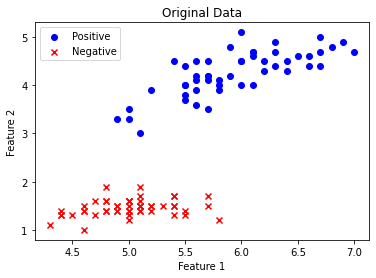

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Original Data')
plt.show()

# **PLA algorithm**
### Feature normalization

First, normalize the two features separately

image.png

Among them, $\mu$ is the feature mean, and $\sigma$ is the feature standard deviation.


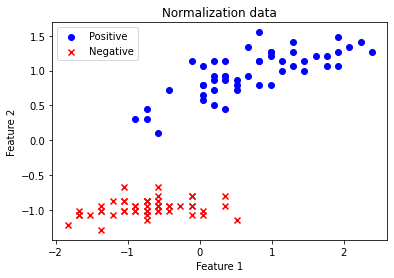

In [31]:
# Mean
u = np.mean(X, axis=0)
# standard deviation
v = np.std(X, axis=0)

X = (X - u) / v

# draw
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Normalization data')
plt.show()

Classification Boundary init

In [32]:
# X + offset
X = np.hstack((np.ones((X.shape[0],1)), X))
# weight init
w = np.random.randn(3,1)

Display initial line position:

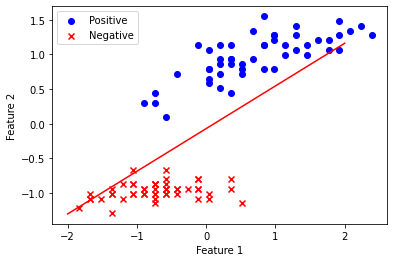

In [33]:
# First coordinate（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# Second coordinate（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# draw
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

Calculate scores, update weights

In [34]:
s = np.dot(X, w)
y_pred = np.ones_like(y)    # predict the output
loc_n = np.where(s < 0)[0]
y_pred[loc_n] = -1

Next, select one of the misclassified samples and use PLA to update the weight coefficient $w$.

In [35]:
# The first error point
t = np.where(y != y_pred)[0][0]
# update weights w
w += y[t] * X[t, :].reshape((3,1))

## **Iterative update training**

Updating the weight $w$ is an iterative process. As long as there are misclassified samples, it will continue to update until all samples are classified correctly. (Note that the premise is that the positive and negative samples are completely separable)

In [36]:
for i in range(100):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    print('Update time %2d, error points: %2d' % (i, num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(y != y_pred)[0][0]
        w += y[t] * X[t, :].reshape((3,1))

Update time  0, error points: 14
Update time  1, error points: 40
Update time  2, error points:  0


Draw result

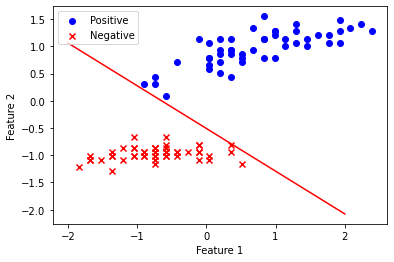

In [37]:
# First coordinate（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# Second coordinate（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# draw
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()